<a href="https://colab.research.google.com/github/piyush1795/Py-piyush/blob/master/Cats_v_Dogs_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-06-12 11:20:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  54.8MB/s    in 1.2s    

2019-06-12 11:20:16 (54.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
history = model.fit_generator(train_generator,
                             validation_data=validation_generator,
                             steps_per_epoch=50,
                             epochs=50,
                             validation_steps=50,
                             verbose=2)

Epoch 1/50
50/50 [==============================] - 4s 76ms/step - loss: 0.6928 - acc: 0.5000
 - 10s - loss: 0.7155 - acc: 0.4910 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/50
50/50 [==============================] - 4s 75ms/step - loss: 0.6519 - acc: 0.6140
 - 10s - loss: 0.6818 - acc: 0.5750 - val_loss: 0.6519 - val_acc: 0.6140
Epoch 3/50
50/50 [==============================] - 4s 74ms/step - loss: 0.5682 - acc: 0.7070
 - 10s - loss: 0.6211 - acc: 0.6695 - val_loss: 0.5682 - val_acc: 0.7070
Epoch 4/50
50/50 [==============================] - 4s 74ms/step - loss: 0.5845 - acc: 0.6950
 - 10s - loss: 0.5494 - acc: 0.7290 - val_loss: 0.5845 - val_acc: 0.6950
Epoch 5/50
50/50 [==============================] - 4s 74ms/step - loss: 0.5548 - acc: 0.7220
 - 10s - loss: 0.5168 - acc: 0.7535 - val_loss: 0.5548 - val_acc: 0.7220
Epoch 6/50
50/50 [==============================] - 4s 75ms/step - loss: 0.6994 - acc: 0.6700
 - 10s - loss: 0.4610 - acc: 0.7745 - val_loss: 0.6994 - val_acc: 0.670

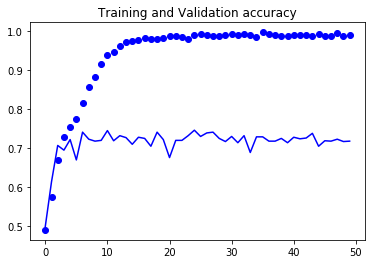

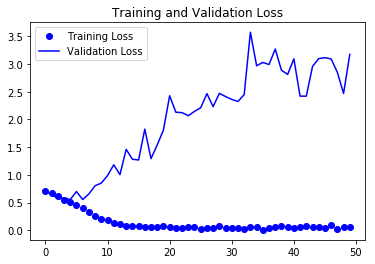

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [21]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-06-12 10:53:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  67.2MB/s    in 1.0s    

2019-06-12 10:53:14 (67.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit_generator(train_generator,
                             validation_data=validation_generator,
                             steps_per_epoch=50,
                             epochs=50,
                             validation_steps=50,
                             verbose=2)

Epoch 1/50
50/50 [==============================] - 4s 89ms/step - loss: 0.6864 - acc: 0.6100
 - 21s - loss: 0.7527 - acc: 0.5250 - val_loss: 0.6864 - val_acc: 0.6100
Epoch 2/50
50/50 [==============================] - 4s 87ms/step - loss: 0.6689 - acc: 0.6090
 - 19s - loss: 0.7030 - acc: 0.5485 - val_loss: 0.6689 - val_acc: 0.6090
Epoch 3/50
50/50 [==============================] - 4s 89ms/step - loss: 0.6521 - acc: 0.6250
 - 19s - loss: 0.6917 - acc: 0.5825 - val_loss: 0.6521 - val_acc: 0.6250
Epoch 4/50
50/50 [==============================] - 4s 87ms/step - loss: 0.6144 - acc: 0.6830
 - 19s - loss: 0.6642 - acc: 0.6330 - val_loss: 0.6144 - val_acc: 0.6830
Epoch 5/50
50/50 [==============================] - 4s 87ms/step - loss: 0.6915 - acc: 0.6260
 - 19s - loss: 0.6463 - acc: 0.6450 - val_loss: 0.6915 - val_acc: 0.6260
Epoch 6/50
50/50 [==============================] - 4s 87ms/step - loss: 0.6308 - acc: 0.6180
 - 19s - loss: 0.6504 - acc: 0.6365 - val_loss: 0.6308 - val_acc: 0.618

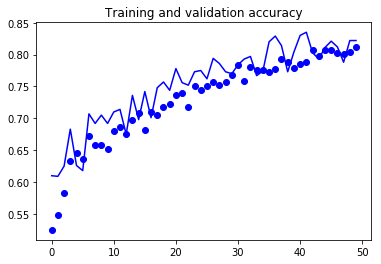

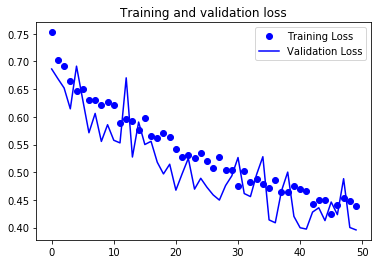

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()